# Clustering techniques
- K-means
- Gaussian Mixture model & EM-steps
  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.datasets import load_sample_image

In [2]:
%matplotlib inline

In [3]:
def compare_images(img, img_compressed, k):
    """
    Show the compressed and uncompressed image side by side

    Args:
        img:            np.array, shape=[image size]
                        original image (before img_compressed)
        img_compressed: np.array, shape=[image size]
                        compressed image
        k:              int or str
                        The number of cluster
    """

    fig, ax = plt.subplots(1, 2, figsize=(16, 12))
    axes[0].set_axis_off()
    if isinstance(k, str):
        ax[0].set_title(k)
    else:
        ax[0].set_title(f"Compressed to {k} colors")

    ax[0].imshow(img_compressed)
    ax[1].set_axis_off()  # not visualize axes
    ax[1].set_title("Original")
    ax[1].imshow(img)


## K-means

Image color clustering


__input__
image(RGB):      np.array, shape=[HxW, 3]

__output__
image_compressed (with k colors):   np.array, shape[H, W, 3]

### Data load

In [4]:
X = load_sample_image("flower.jpg")

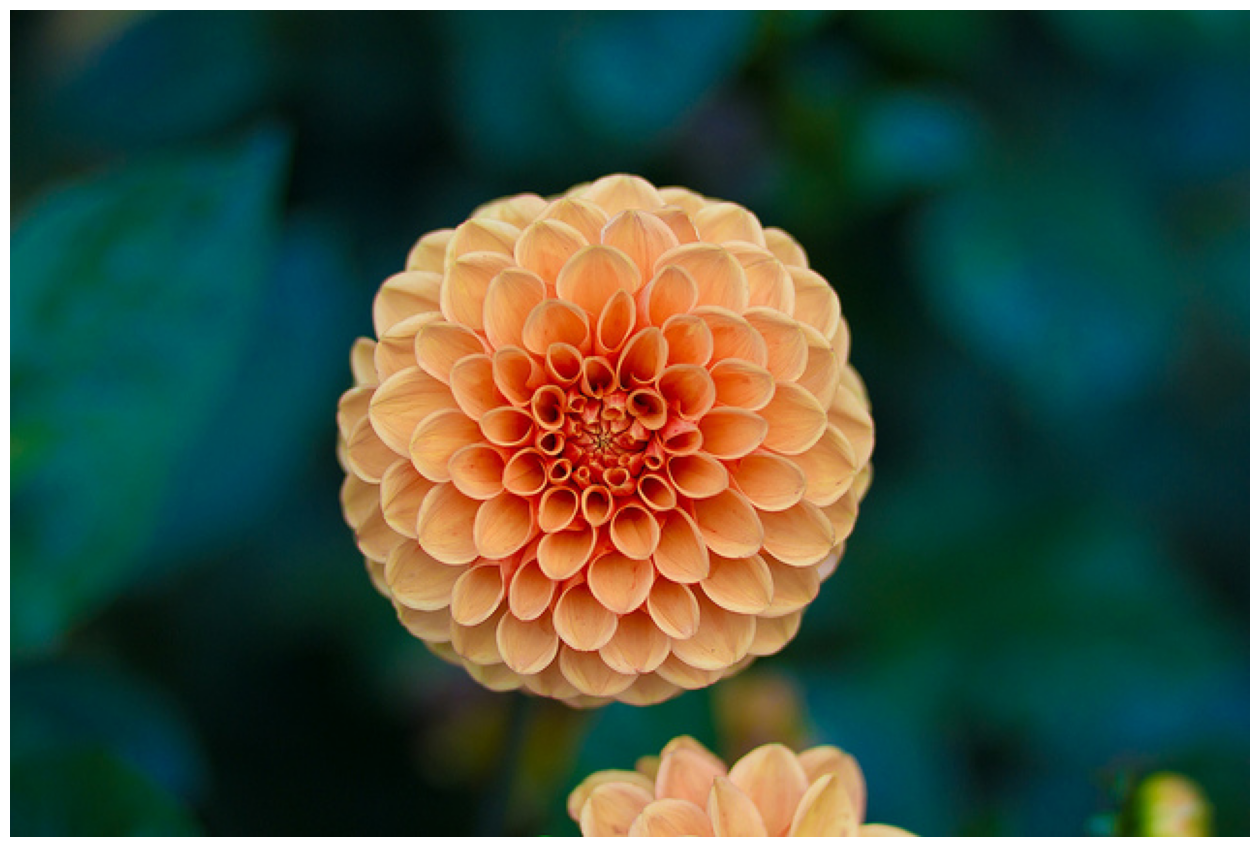

In [5]:
fig, axis = plt.subplots(figsize = (16, 12))
axis.set_axis_off()
axis.imshow(X)

In [6]:
"""
Args:
    X:  np.array of size N x D
        where N is the number of samples and D is the data dimensionality
        If the RGB image is input, the shape of input is going to be [HxW, 3]
    k:  int
        Number of clusters

Returns:
    mu: np.array of size k x D
        Cluster centers
    z:  np.array of size N
        Cluster indicators, i.e. id of color, such as 0...k-1 for each color
"""

'\nArgs:\n    X:  np.array of size N x D\n        where N is the number of samples and D is the data dimensionality\n        If the RGB image is input, the shape of input is going to be [HxW, 3]\n    k:  int\n        Number of clusters\n\nReturns:\n    mu: np.array of size k x D\n        Cluster centers\n    z:  np.array of size N\n        Cluster indicators, i.e. id of color, such as 0...k-1 for each color\n'

In [7]:
k = 5

In [8]:
# reshape the input when it has more than 2 dimensions
print(X.shape)
print(len(X.shape))

if len(X.shape) > 2:
    ch = X.shape[2]
    reshaped_X = X.reshape([-1, ch])
print(reshaped_X.shape)

(427, 640, 3)
3
(273280, 3)


In [9]:
# sample 1
sample_1 = reshaped_X[0][:]
print(sample_1)

[ 2 19 13]


In [10]:
# Initializing centroid
N = reshaped_X.shape[0]
print(N)
centroids_id = []
centroids = []
center = np.random.choice(N)
centroids_id.append(center)
centroids.append(reshaped_X[center][:])
print(centroids)

273280
[array([201, 177, 113], dtype=uint8)]


In [11]:
V_2 = np.zeros((N, k))

In [12]:
sub = []
squared = []
squared_sum = []

In [13]:
# subtract every sample point from centroid
sub.append(reshaped_X - centroids[0][None, :])
squared.append(sub[0] ** 2)
squared_sum.append(np.sum(squared[0], -1))
V_2[:, 0] = squared_sum[0]

In [14]:
print(V_2)

[[325.   0.   0.   0.   0.]
 [245.   0.   0.   0.   0.]
 [ 93.   0.   0.   0.   0.]
 ...
 [ 70.   0.   0.   0.   0.]
 [202.   0.   0.   0.   0.]
 [264.   0.   0.   0.   0.]]


In [15]:
print(squared_sum[0].shape)

(273280,)


In [16]:
# obtain the most distancing sample
next_centroid = np.argmax(squared_sum[0])
centroids_id.append(next_centroid)
centroids.append(reshaped_X[next_centroid][:])
V_2[next_centroid][:] = np.zeros(k)
print(next_centroid)
print(centroids)

220404
[array([201, 177, 113], dtype=uint8), array([148, 124,  60], dtype=uint8)]


In [17]:
# substract every sample point from centroid
sub.append(reshaped_X - centroids[1][None, :])
squared.append(sub[1] ** 2)
squared_sum.append(np.sum(squared[1], -1))
V_2[:, 1] = squared_sum[1]
print(V_2)

[[325. 246.   0.   0.   0.]
 [245. 422.   0.   0.   0.]
 [ 93. 394.   0.   0.   0.]
 ...
 [ 70. 365.   0.   0.   0.]
 [202. 241.   0.   0.   0.]
 [264. 347.   0.   0.   0.]]


In [18]:
print(squared_sum[1].shape)

(273280,)


In [19]:
next_centroid = np.max(V_2, -1).argmax()
centroids_id.append(next_centroid)
centroids.append(reshaped_X[next_centroid][:])
V_2[next_centroid][:] = np.zeros(k)
print(centroids)

[array([201, 177, 113], dtype=uint8), array([148, 124,  60], dtype=uint8), array([201, 177, 113], dtype=uint8)]


In [20]:
sub.append(reshaped_X - centroids[2][None, :])
squared.append(sub[2] ** 2)
squared_sum.append(np.sum(squared[2], -1))
V_2[:, 2] = squared_sum[2]
print(V_2)

[[325. 246. 325.   0.   0.]
 [245. 422. 245.   0.   0.]
 [ 93. 394.  93.   0.   0.]
 ...
 [ 70. 365.  70.   0.   0.]
 [202. 241. 202.   0.   0.]
 [264. 347. 264.   0.   0.]]


In [21]:
def reshape_input(X):
    if len(X.shape) > 2:
        ch = X.shape[2]
        reshaped_X = X.reshape([-1, ch])
    return reshaped_X

In [137]:
def init_centroid(X, k):
    """
    Args:
        X:      np.array, shape=[N, D]
                The input image to be clustered into k colors
        k:      int
                The number of the clusters
    
    Returns:
        initial_centroids:      np.array shape=(k, D)
                                reasonably selected k centroids
        initial_centroids_id:   np.array, shape=(k,)
                                ids of selected samples as initial centroid
    
    """
    reshaped_X = reshape_input(X)
    # Obtain the number of the sample
    N = reshaped_X.shape[0]

    centroids_id = []
    centroids = []
    V_2 = np.zeros((N, k))
    sub = []
    squared = []
    squared_sum = []

    for i in range(k):
        if i == 0:
            # Randomly selects sample as an initial centroid
            center = np.random.choice(N)
            print(V_2[center][:])
        else:
            center = np.sum(V_2, -1).argmax()

        centroids_id.append(center)
        centroids.append(reshaped_X[center][:])
        # Subtract every sample point from centroid
        sub.append(reshaped_X - centroids[i][None, :])
        # Squared each entries
        squared.append(sub[i] ** 2)
        # Calculate sum of squared
        squared_sum.append(np.sum(squared[i], -1))
        # copy onto the V_2 which will store k-distance for each entries
        V_2[:, i] = squared_sum[i]
        V_2[center][:] = np.zeros(k)

        print(V_2[center][:])
        print(center)
    return centroids, centroids_id

In [138]:
cents, cents_id = init_centroid(X, k)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
55138
[0. 0. 0. 0. 0.]
173729
[0. 0. 0. 0. 0.]
134696
[0. 0. 0. 0. 0.]
214815
[0. 0. 0. 0. 0.]
136569


In [139]:
print(cents)

[array([ 1, 74, 81], dtype=uint8), array([171,  21,   6], dtype=uint8), array([218,  96,  59], dtype=uint8), array([12, 43, 28], dtype=uint8), array([226, 127,  59], dtype=uint8)]


In [140]:
print(cents[:][0].shape)
k = 5
D = X.shape[-1]
print(D)
cents_array = np.zeros((k, D))

for idx, coords in enumerate(cents):
    cents_array[idx] = coords

print(cents_array)
print(cents_array.shape)

(3,)
3
[[  1.  74.  81.]
 [171.  21.   6.]
 [218.  96.  59.]
 [ 12.  43.  28.]
 [226. 127.  59.]]
(5, 3)


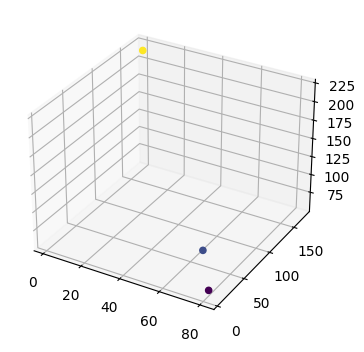

In [141]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

max_ax = np.max(cents)

x, y, z = cents_array[:][0], cents_array[:][1], cents_array[:][2]

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = z, alpha = 1)
plt.show()

5
(5, 3)


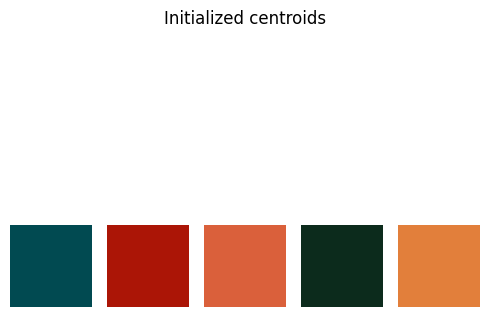

In [158]:
print(len(cents))
cents = np.array(cents)
print(cents.shape)
colors = []
for i in range(len(cents)):
    colors.append(np.expand_dims(cents[i], axis = (0, 1)))

colors[0].shape
fig, axes = plt.subplots(1, k, figsize = (5, 5))
fig.suptitle("Initialized centroids")
for id, ax in enumerate(axes):
    ax.imshow(colors[id])
    ax.set_axis_off()
    

In [47]:
print(cents_id)

[169519, 190497, 29864, 124475, 180940]


SyntaxError: invalid syntax (144312362.py, line 1)